In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [104]:
# Specify the path to your CSV file
book_snapshot_5_path = 'datasets/deribit_book_snapshot_5_2024-09-01_BTC-PERPETUAL.csv.gz'
# incremental_book_L2_path = 'datasets/deribit_incremental_book_L2_2024-09-01_BTC-PERPETUAL.csv.gz'
# Read the compressed CSV file using pandas
book_snapshot_5 = pd.read_csv(book_snapshot_5_path, compression='gzip')
# incremental_book_L2= pd.read_csv(incremental_book_L2_path, compression='gzip')

In [105]:
derivative_ticker_path = 'datasets/deribit_derivative_ticker_2024-09-01_BTC-PERPETUAL.csv.gz'
derivative_ticker= pd.read_csv(derivative_ticker_path, compression='gzip')


In [99]:
# Display the contents of the DataFrame (optional)
book_snapshot_5.head()

,exchange,symbol,timestamp,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,bids[1].price,...,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount
0,deribit,BTC-PERPETUAL,1725148800151000,58971.0,172780,58970.5,7050,58972.5,6500,58967.5,...,58967.0,10000,58975.5,35900,58964.5,10330,58976.0,1290,58963.0,1280
1,deribit,BTC-PERPETUAL,1725148800376000,58971.0,178840,58970.5,7050,58972.5,6500,58967.5,...,58967.0,10000,58975.5,35900,58964.5,10330,58976.0,1290,58963.0,1280
2,deribit,BTC-PERPETUAL,1725148800622000,58971.0,179840,58970.5,7050,58972.5,6500,58967.5,...,58967.0,10000,58975.5,35900,58964.5,10330,58976.0,1290,58963.0,1280
3,deribit,BTC-PERPETUAL,1725148800810000,58971.0,179840,58970.5,7050,58972.5,6500,58967.5,...,58967.0,10000,58975.5,35900,58964.5,10330,58976.0,1290,58963.0,31280
4,deribit,BTC-PERPETUAL,1725148800906000,58971.0,179840,58970.5,60,58972.5,6500,58967.5,...,58967.0,10000,58975.5,35900,58965.0,101000,58976.0,1290,58964.5,10330


In [106]:
# Select Field from Datasets
P_book_snapshot_5=book_snapshot_5
P_book_snapshot_5.pop("local_timestamp")
P_derivative_ticker=derivative_ticker[["exchange","symbol", "timestamp","last_price", "index_price", "mark_price"]]


In [ ]:
# TODO: Time interval 

In [107]:
# To readable timeframe
test=P_derivative_ticker
test['timestamp']= pd.to_datetime(test['timestamp'], unit='us')

/var/folders/th/2hk9yq1j1mggcd13vp8_wn880000gn/T/ipykernel_2679/2775975423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['timestamp']= pd.to_datetime(test['timestamp'], unit='us')


In [126]:
window_size = 4  # Adjust the window size as needed
test['smoothed_last_price'] = test['last_price'].rolling(window=window_size).mean()

/var/folders/th/2hk9yq1j1mggcd13vp8_wn880000gn/T/ipykernel_2679/812669000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['smoothed_last_price'] = test['last_price'].rolling(window=window_size).mean()


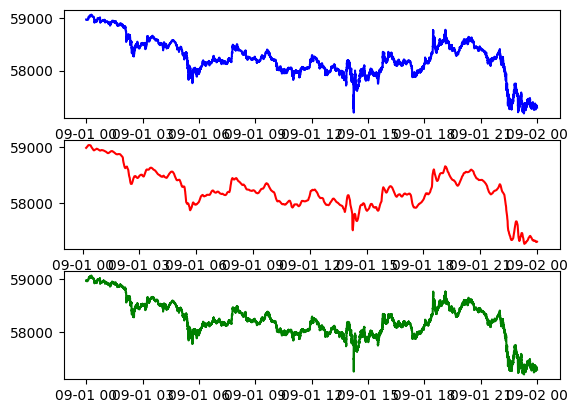

In [120]:
fig, axs = plt.subplots(3)

axs[0].plot(test['timestamp'],test['last_price'],color='b')
axs[1].plot(test['timestamp'],test['smoothed_last_price'],color='r')
axs[2].plot(test['timestamp'],test['index_price'],color='g')

plt.show()
